In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

df_esg = pd.read_csv("ESGData_cleaned2.csv")
df_esg.columns = df_esg.columns.str.replace('\n', '')

Y = df_esg["MSCI ESG Rating"]
X = df_esg.drop(["MSCI ESG Rating", "Ticker"], axis=1)

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

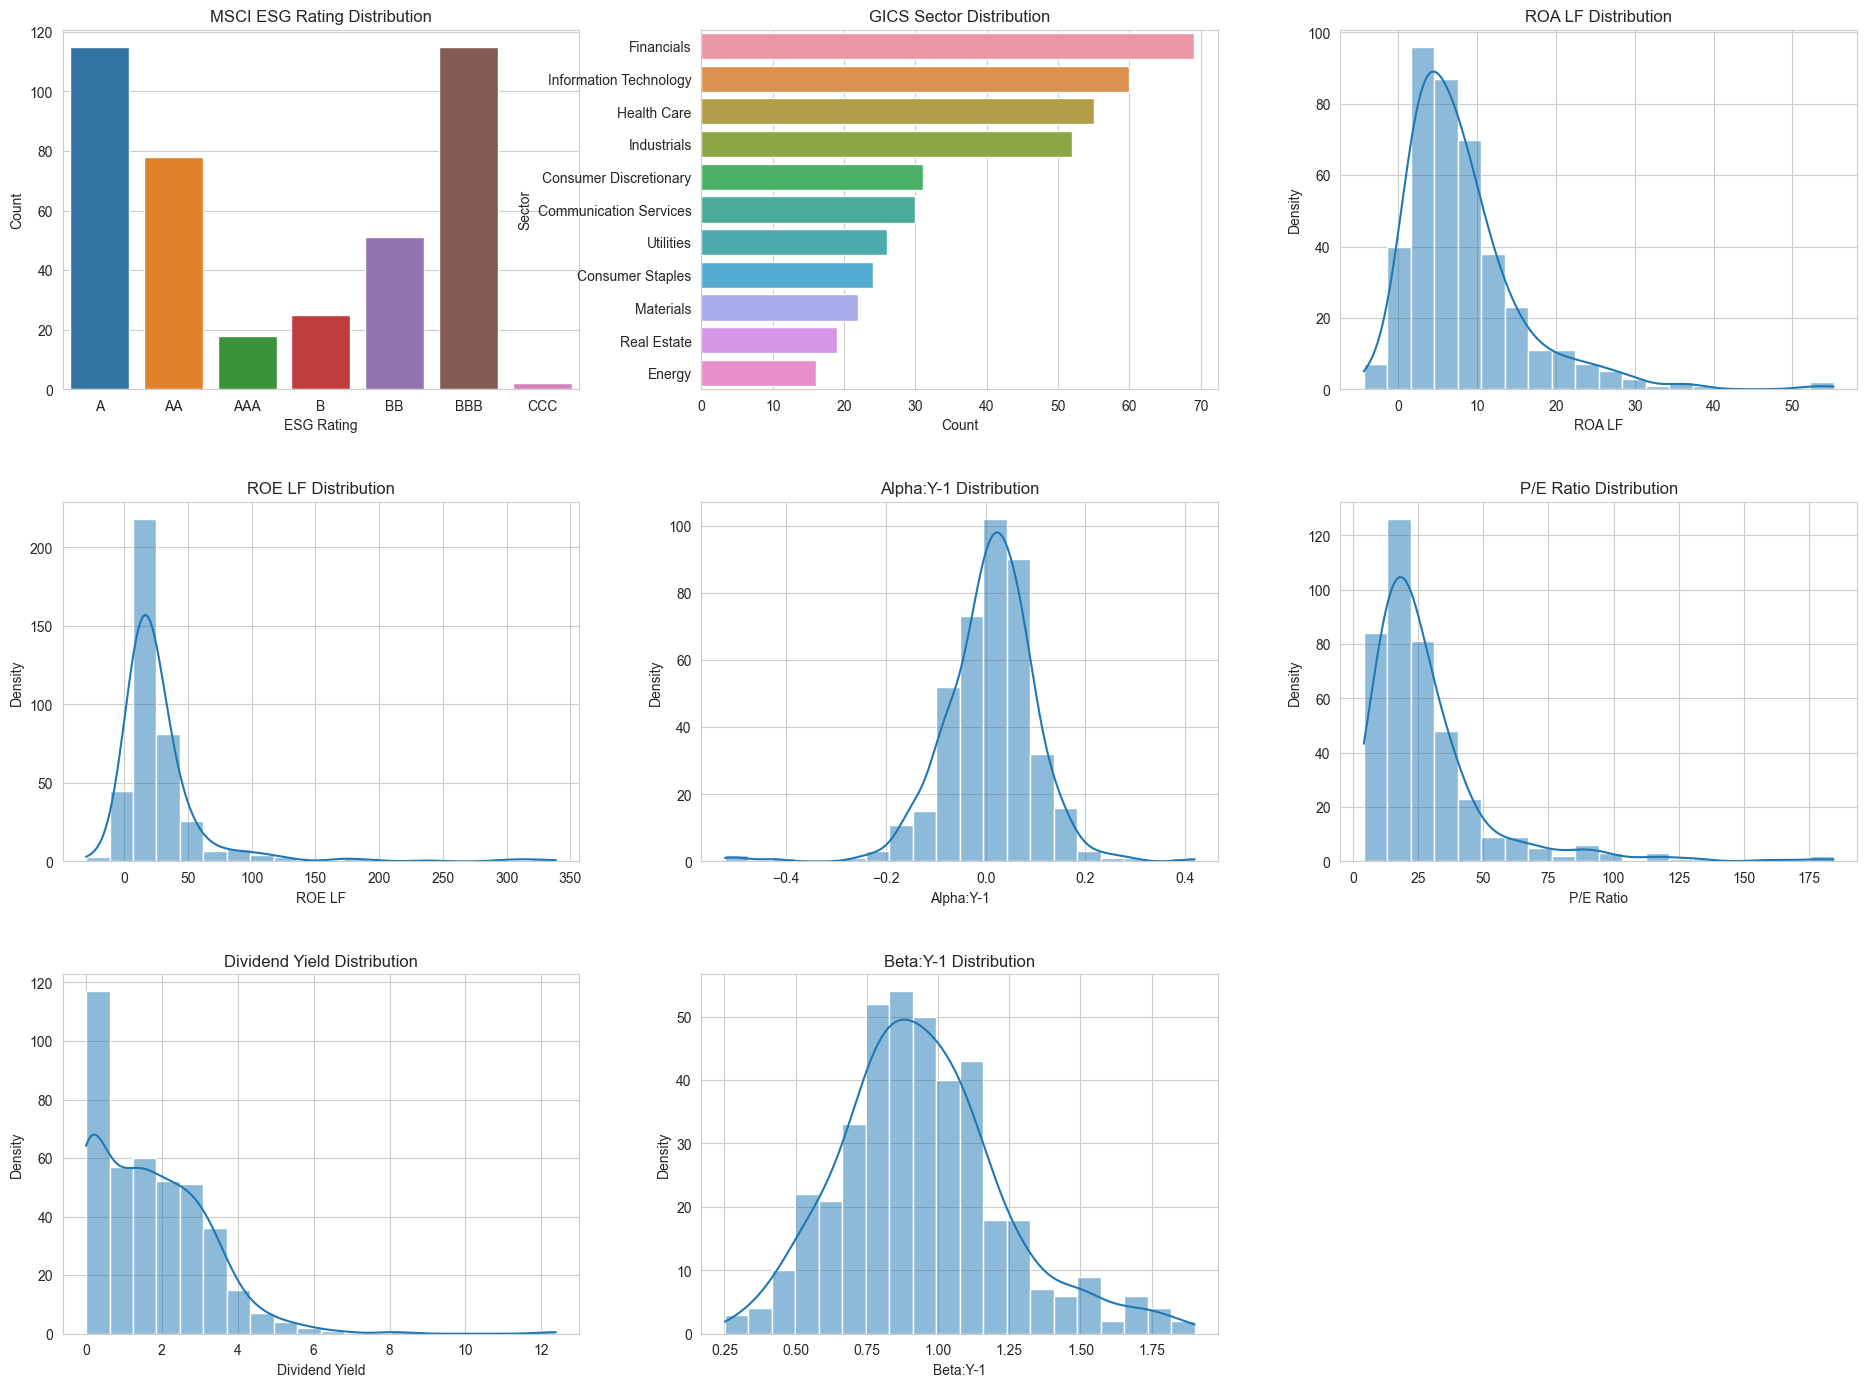

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure for subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Adjust layout
plt.tight_layout(pad=6.0)

# Plotting
# MSCI ESG Rating distribution
Y_train_df = Y_train.reset_index(drop=True).to_frame(name="MSCI ESG Rating")

# Plotting MSCI ESG Rating distribution
sns.countplot(x='MSCI ESG Rating', data=Y_train_df, ax=axes[0, 0], order=sorted(Y_train_df['MSCI ESG Rating'].unique()))
axes[0, 0].set_title('MSCI ESG Rating Distribution')
axes[0, 0].set_xlabel('ESG Rating')
axes[0, 0].set_ylabel('Count')

# GICS Sector distribution
sns.countplot(y='GICS Sector', data=X_train, ax=axes[0, 1], order=X_train['GICS Sector'].value_counts().index)
axes[0, 1].set_title('GICS Sector Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Sector')

# ROA LF
sns.histplot(X_train['ROA LF'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('ROA LF Distribution')
axes[0, 2].set_xlabel('ROA LF')
axes[0, 2].set_ylabel('Density')

# ROE LF
sns.histplot(X_train['ROE LF'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('ROE LF Distribution')
axes[1, 0].set_xlabel('ROE LF')
axes[1, 0].set_ylabel('Density')

# Alpha:Y-1
sns.histplot(X_train['Alpha:Y-1'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Alpha:Y-1 Distribution')
axes[1, 1].set_xlabel('Alpha:Y-1')
axes[1, 1].set_ylabel('Density')

# P/E
sns.histplot(X_train['P/E'], bins=20, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('P/E Ratio Distribution')
axes[1, 2].set_xlabel('P/E Ratio')
axes[1, 2].set_ylabel('Density')

# Dvd Est Yld
sns.histplot(X_train['Dvd Est Yld'], bins=20, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Dividend Yield Distribution')
axes[2, 0].set_xlabel('Dividend Yield')
axes[2, 0].set_ylabel('Density')

# Beta:Y-1
sns.histplot(X_train['Beta:Y-1'], bins=20, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Beta:Y-1 Distribution')
axes[2, 1].set_xlabel('Beta:Y-1')
axes[2, 1].set_ylabel('Density')

# Remove the empty subplot
fig.delaxes(axes[2][2])

plt.show()

In [98]:
features_to_transform = ['ROA LF', 'ROE LF', 'P/E', 'Dvd Est Yld']
X_train_trans = X_train.copy()

for feature in features_to_transform:
    # Applying log1p to ensure there is no issue with log(0)
    X_train_trans [feature] = np.log1p(X_train_trans [feature])
    
# Check for any inf or -inf values which can occur if there were any negative values in the data
X_train_trans .replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows that might have resulted in NaN after log transformation (if any negative values were present)
X_train_trans .dropna(inplace=True)

# Corresponding Y values need to be adjusted as well since rows could have been dropped from X
Y_train_trans = Y_train[X_train_trans.index]

/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [99]:
features_to_transform = ['ROA LF', 'ROE LF', 'P/E', 'Dvd Est Yld']
X_test_trans = X_test.copy()

for feature in features_to_transform:
    # Applying log1p to ensure there is no issue with log(0)
    X_test_trans[feature] = np.log1p(X_test_trans[feature])
    

# Check for any inf or -inf values which can occur if there were any negative values in the data
X_test_trans.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows that might have resulted in NaN after log transformation (if any negative values were present)
X_test_trans.dropna(inplace=True)

# Corresponding Y values need to be adjusted as well since rows could have been dropped from X
Y_test_trans = Y_test[X_test_trans.index]

In [100]:
X_train_trans

,ROA LF,ROE LF,Alpha:Y-1,P/E,Dvd Est Yld,Beta:Y-1,GICS Sector
477,2.111927,3.307245,0.010108,3.079982,0.000000,1.264728,Industrials
15,2.566116,3.478761,0.073508,3.367689,1.158138,0.504555,Consumer Staples
332,1.477242,1.669920,-0.165698,4.469475,0.000000,1.077428,Industrials
19,1.871537,2.871093,-0.010427,3.108784,0.966604,0.577616,Consumer Staples
335,2.666736,3.312461,0.036071,3.735642,0.269111,1.670812,Information Technology
...,...,...,...,...,...,...,...
106,2.838761,4.104367,0.101770,2.938456,0.992881,0.504735,Industrials
270,2.300936,2.992109,0.161213,2.643035,0.486553,1.199076,Materials
348,2.221261,2.906979,-0.002867,2.478296,0.410453,0.905802,Health Care
435,1.446126,3.242145,-0.024776,3.099635,0.000000,0.672893,Communication Services


In [102]:
# Encode the 'MSCI ESG Rating' categorical data into numeric
label_encoder = LabelEncoder()
Y_train_trans = label_encoder.fit_transform(Y_train_trans)
Y_test_trans = label_encoder.fit_transform(Y_test_trans)
X_train_trans = pd.get_dummies(X_train_trans, columns=['GICS Sector'])
X_test_trans = pd.get_dummies(X_test_trans, columns=['GICS Sector'])

In [103]:
lda = LinearDiscriminantAnalysis().fit(X_train_trans, Y_train_trans)
Y_pred_lda = lda.predict(X_test_trans)
accuracy_lda = accuracy_score(Y_test_trans, Y_pred_lda)

qda = QuadraticDiscriminantAnalysis().fit(X_train_trans, Y_train_trans)
Y_pred_qda = qda.predict(X_test_trans)
accuracy_qda = accuracy_score(Y_test_trans, Y_pred_qda)

accuracy_lda, accuracy_qda

/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


(0.25, 0.05)

In [ ]:
# Encode the 'MSCI ESG Rating' categorical data into numeric
label_encoder = LabelEncoder()
df_esg['MSCI ESG Rating'] = label_encoder.fit_transform(df_esg['MSCI ESG Rating'])
X = pd.get_dummies(X, columns=['GICS Sector'])

In [ ]:
# Y_pred_lda = lda.predict(X_train)
# accuracy_lda = accuracy_score(Y_train, Y_pred_lda)
# Y_pred_qda = qda.predict(X_train)
# accuracy_qda = accuracy_score(Y_train, Y_pred_qda)
# accuracy_lda, accuracy_qda

/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


(0.35396039603960394, 0.04455445544554455)